In [309]:
# !pip install easyocr
# !pip install imutils

In [19]:
import imutils
import easyocr

In [2]:
import cv2
import matplotlib.pyplot as plt
import os

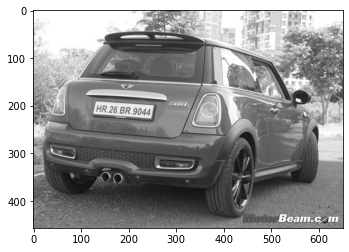

In [298]:
img = cv2.imread('image1.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

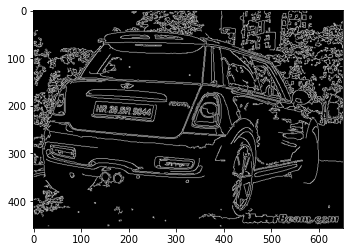

In [299]:
bfilter = cv2.bilateralFilter(gray, 11, 17, 17) #Noise reduction
edged = cv2.Canny(bfilter, 30, 200) #Edge detection
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

In [300]:
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE) #traverse tree to get contour, simplified version of contour
contours = imutils.grab_contours(keypoints) #simplyfy contours
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10] #sorting by area in descending

In [301]:
# keypoints[0][0]

In [302]:
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True) #10 -how accurate contour is, approx polygon from contour
    if len(approx) == 4:
        location = approx
        break

In [314]:
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0,255, -1)
new_image = cv2.bitwise_and(img, img, mask=mask)

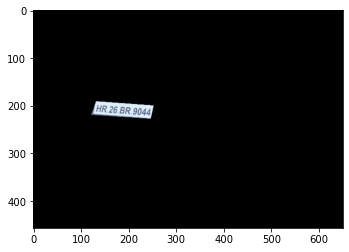

In [304]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

In [315]:
(x,y) = np.where(mask==255) #get all black area
(x1, y1) = (np.min(x), np.min(y)) #get upper line
(x2, y2) = (np.max(x), np.max(y)) #get lower line
cropped_image = gray[x1:x2+1, y1:y2+1]

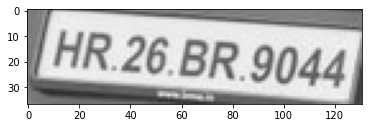

In [316]:
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

In [317]:
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image)
result

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[([[6, 4], [128, 4], [128, 34], [6, 34]], 'HR.26 BR.9044', 0.5728024956877317)]

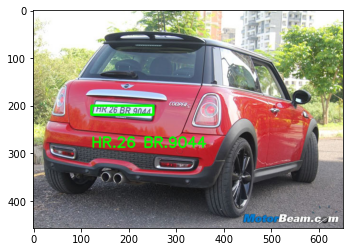

In [318]:
text = result[0][-2]
font = cv2.FONT_HERSHEY_SIMPLEX
res = cv2.putText(img, text=text, org=(approx[0][0][0], approx[1][0][1]+60), fontFace=font, fontScale=1, color=(0,255,0), thickness=2, lineType=cv2.LINE_AA)
res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0,255,0),3)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))